In [16]:
import numpy as np
import pandas as pd
import datetime
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [17]:
df = pd.read_csv('DATA/SA_0000001400.csv')

In [18]:
df.head()

,Id,IndicatorCode,SpatialDimension,SpatialDimensionValueCode,ParentLocationCode,ParentLocation,TimeDimension,TimeDim,DisaggregatingDimension1,DisaggregatingDimension1ValueCode,...,DataSourceDimensionValueCode,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,114,SA_0000001400,COUNTRY,LBY,EMR,Eastern Mediterranean,YEAR,2015,ALCOHOLTYPE,ALCOHOLTYPE_SA_OTHER_ALCOHOL,...,DATASOURCE_GISAHLBY,0.00,0.00447,NaN,NaN,NaN,2024-08-12T15:16:09Z,2015,2015-01-01,2015-12-31
1,363,SA_0000001400,COUNTRY,ARE,EMR,Eastern Mediterranean,YEAR,2014,ALCOHOLTYPE,ALCOHOLTYPE_SA_OTHER_ALCOHOL,...,DATASOURCE_GISAHARE,0.00,0.01357,NaN,NaN,NaN,2024-08-12T15:16:09Z,2014,2014-01-01,2014-12-31
2,533,SA_0000001400,COUNTRY,NGA,AFR,Africa,YEAR,1969,ALCOHOLTYPE,ALCOHOLTYPE_SA_WINE,...,DATASOURCE_GISAHNGA,0.00,0.00000,NaN,NaN,NaN,2018-05-11T09:09:10Z,1969,1969-01-01,1969-12-31
3,541,SA_0000001400,COUNTRY,PNG,WPR,Western Pacific,YEAR,1973,ALCOHOLTYPE,ALCOHOLTYPE_SA_SPIRITS,...,DATASOURCE_GISAHPNG,0.21,0.21000,NaN,NaN,NaN,2018-05-11T09:04:40Z,1973,1973-01-01,1973-12-31
4,786,SA_0000001400,COUNTRY,USA,AMR,Americas,YEAR,1981,ALCOHOLTYPE,ALCOHOLTYPE_SA_BEER,...,DATASOURCE_GISAHUSA,5.26,5.26000,NaN,NaN,NaN,2018-05-11T09:09:54Z,1981,1981-01-01,1981-12-31


In [19]:
df.columns

Index(['Id', 'IndicatorCode', 'SpatialDimension', 'SpatialDimensionValueCode',
       'ParentLocationCode', 'ParentLocation', 'TimeDimension', 'TimeDim',
       'DisaggregatingDimension1', 'DisaggregatingDimension1ValueCode',
       'DisaggregatingDimension2', 'DisaggregatingDimension2ValueCode',
       'DisaggregatingDimension3', 'DisaggregatingDimension3ValueCode',
       'DataSourceDimension', 'DataSourceDimensionValueCode', 'Value',
       'NumericValue', 'Low', 'High', 'Comments', 'Date', 'TimeDimensionValue',
       'TimeDimensionBegin', 'TimeDimensionEnd'],
      dtype='object')

In [21]:
# Summary of missing values and total observations for each variable
df_info = df.dtypes
missing_summary = df.isnull().sum()
total_observations = df.shape[0]
missing_df_report = pd.DataFrame({
    "Variable": df.columns,
    "Data Type": df_info.values,
    "Total Observations": total_observations,
    "Missing Observations": missing_summary.values
})

missing_df_report

,Variable,Data Type,Total Observations,Missing Observations
0,Id,int64,48924,0
1,IndicatorCode,object,48924,0
2,SpatialDimension,object,48924,0
3,SpatialDimensionValueCode,object,48924,0
4,ParentLocationCode,object,48924,0
5,ParentLocation,object,48924,0
6,TimeDimension,object,48924,0
7,TimeDim,int64,48924,0
8,DisaggregatingDimension1,object,48924,0
9,DisaggregatingDimension1ValueCode,object,48924,0


In [22]:
# Summary statistics for quantitative variables
quantitative_vars = df.select_dtypes(include=['float64', 'int64']).columns
quantitative_summary = df[quantitative_vars].describe().T
quantitative_summary

,count,mean,std,min,25%,50%,75%,max
Id,48924.0,3.837333e+06,2.215179e+06,114.00000,1.918035e+06,3.854824e+06,5.748203e+06,7.674229e+06
TimeDim,48924.0,1.992921e+03,1.701281e+01,1960.00000,1.979000e+03,1.994000e+03,2.008000e+03,2.020000e+03
DisaggregatingDimension2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DisaggregatingDimension2ValueCode,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DisaggregatingDimension3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DisaggregatingDimension3ValueCode,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,48924.0,2.011858e+00,2.978060e+00,-0.10000,4.000000e-02,7.000000e-01,2.800000e+00,2.604000e+01
NumericValue,48924.0,2.012356e+00,2.977688e+00,-0.09294,4.894000e-02,6.900000e-01,2.780000e+00,2.604000e+01
Low,140.0,2.483253e+00,2.391001e+00,0.09668,1.198405e+00,1.733685e+00,2.498182e+00,8.397070e+00
High,140.0,4.675884e+00,3.628753e+00,0.22578,2.732457e+00,3.923495e+00,5.578538e+00,1.337817e+01


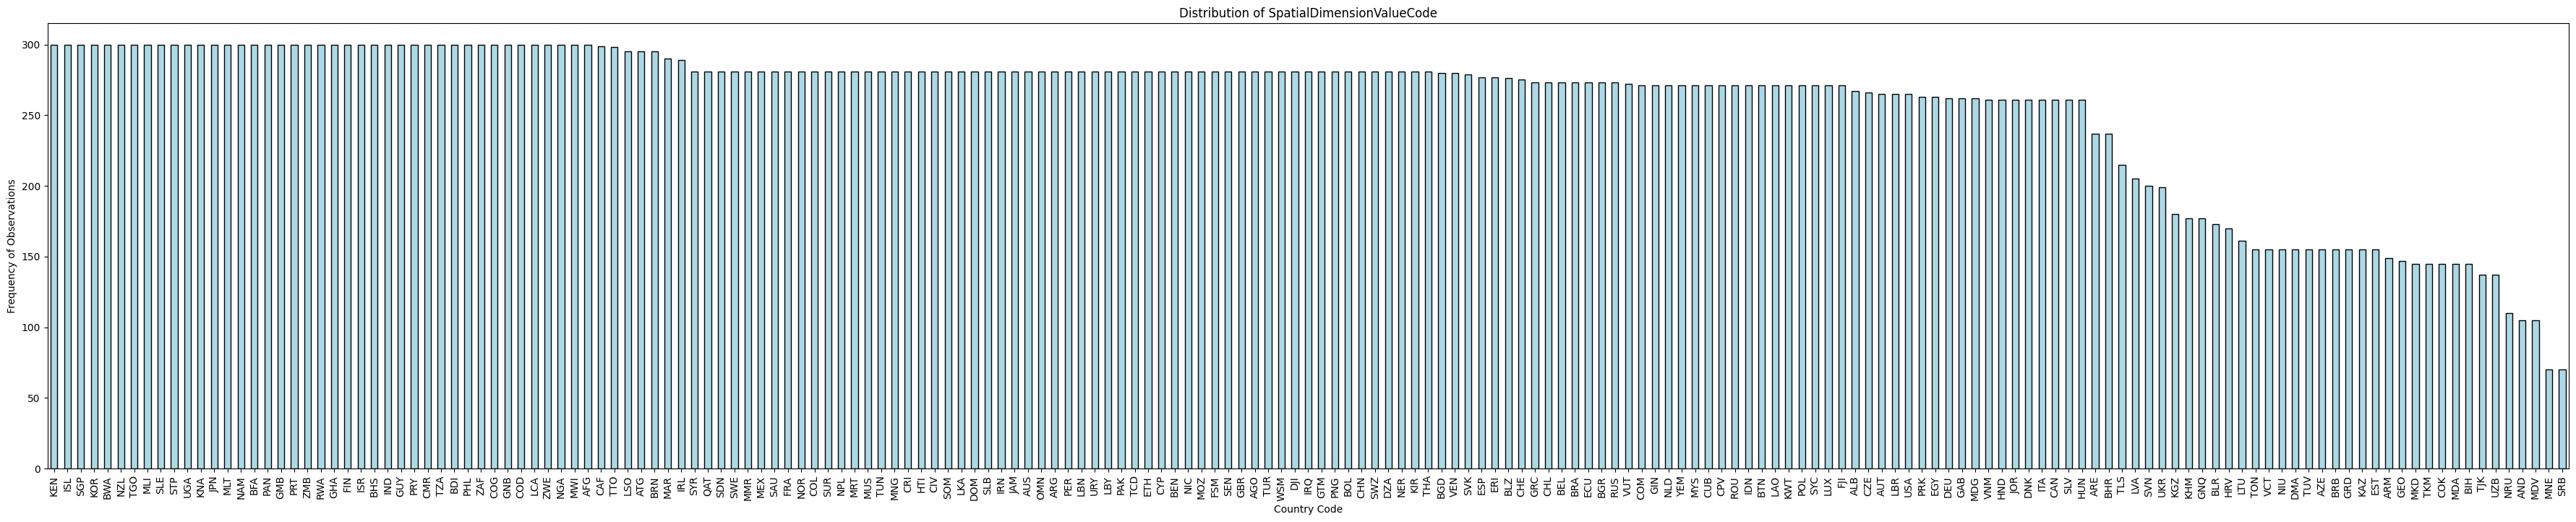

In [26]:
spatial_dimension_freq = df['SpatialDimensionValueCode'].value_counts()

# Plotting the distribution of 'SpatialDimensionValueCode'
plt.figure(figsize=(45, 8))
spatial_dimension_freq.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Distribution of SpatialDimensionValueCode')
plt.xlabel('Country Code')
plt.ylabel('Frequency of Observations')
plt.xticks(rotation=90)
plt.show()

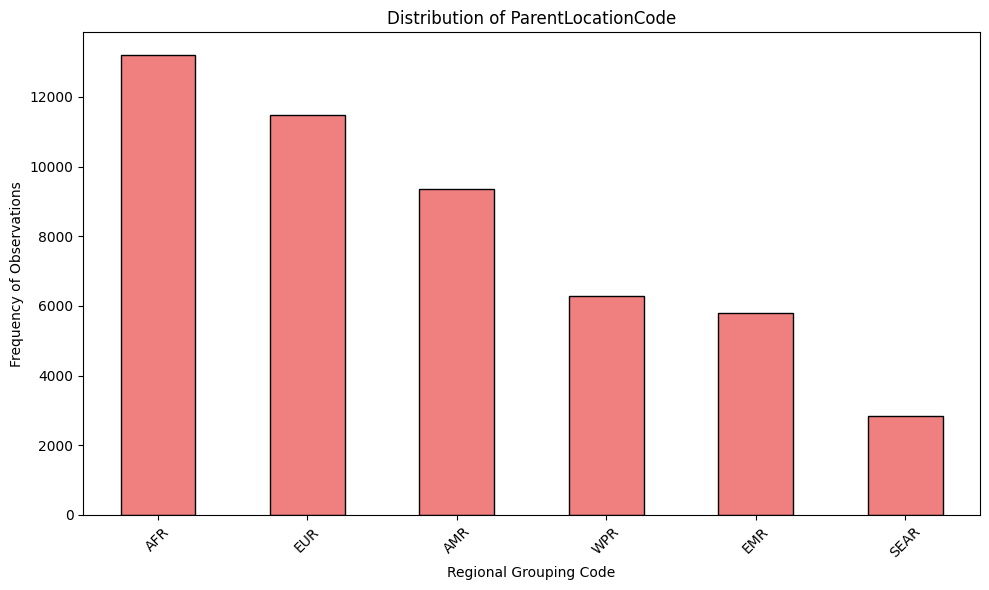

In [28]:
# Generating a frequency distribution bar chart for the 'ParentLocationCode' variable

parent_location_freq = df['ParentLocationCode'].value_counts()

# Plotting the distribution of 'ParentLocationCode'
plt.figure(figsize=(10, 6))
parent_location_freq.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Distribution of ParentLocationCode')
plt.xlabel('Regional Grouping Code')
plt.ylabel('Frequency of Observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

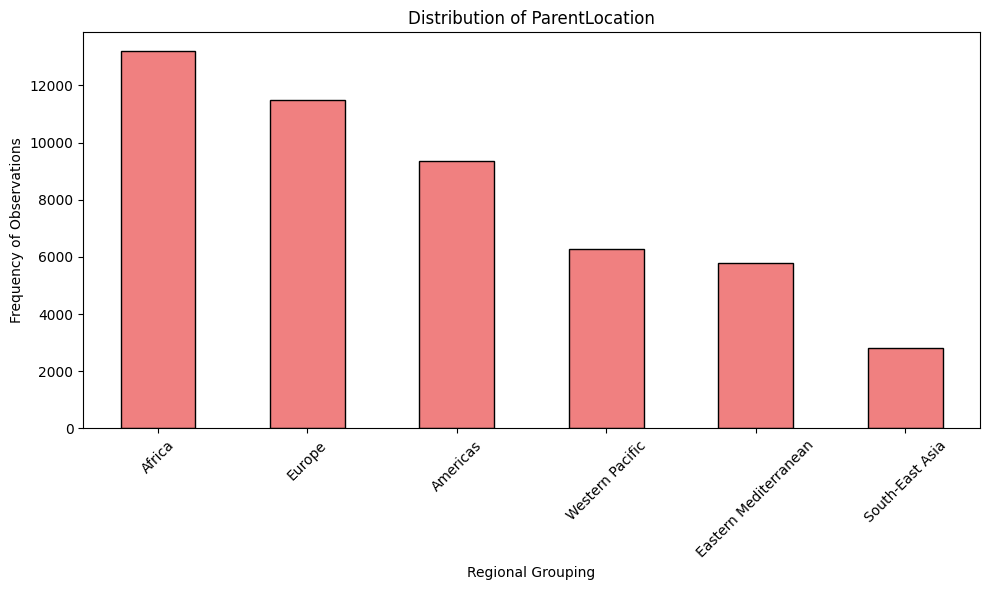

In [29]:
# Calculating the frequency distribution for 'ParentLocation'
parent_location_freq = df['ParentLocation'].value_counts()

# Plotting the distribution of 'ParentLocation'
plt.figure(figsize=(10, 6))
parent_location_freq.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Distribution of ParentLocation')
plt.xlabel('Regional Grouping')
plt.ylabel('Frequency of Observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

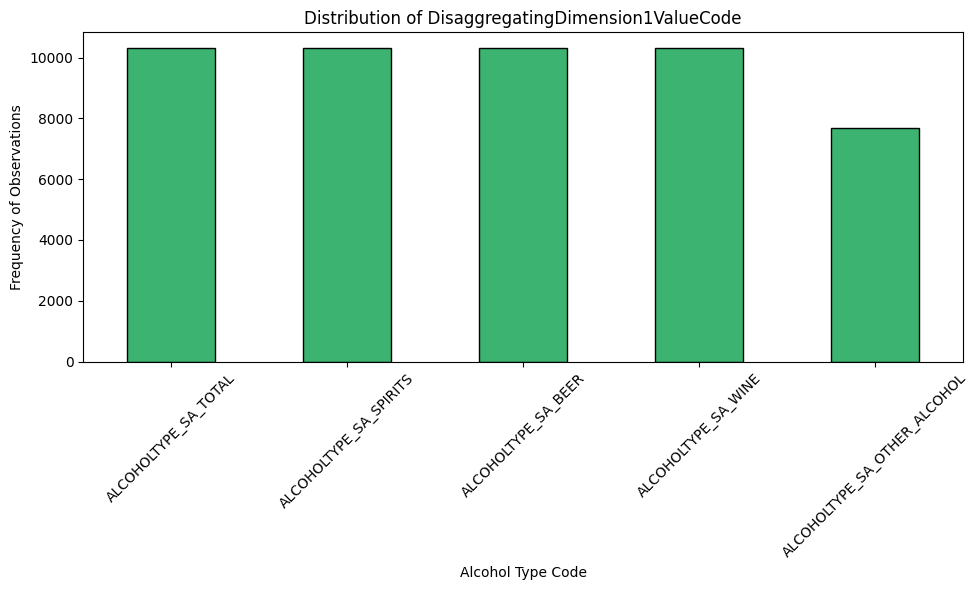

In [31]:
# Calculating the frequency distribution for 'DisaggregatingDimension1ValueCode'
disaggregating_dim1_value_code_freq = df['DisaggregatingDimension1ValueCode'].value_counts()

# Plotting the distribution of 'DisaggregatingDimension1ValueCode'
plt.figure(figsize=(10, 6))
disaggregating_dim1_value_code_freq.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Distribution of DisaggregatingDimension1ValueCode')
plt.xlabel('Alcohol Type Code')
plt.ylabel('Frequency of Observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

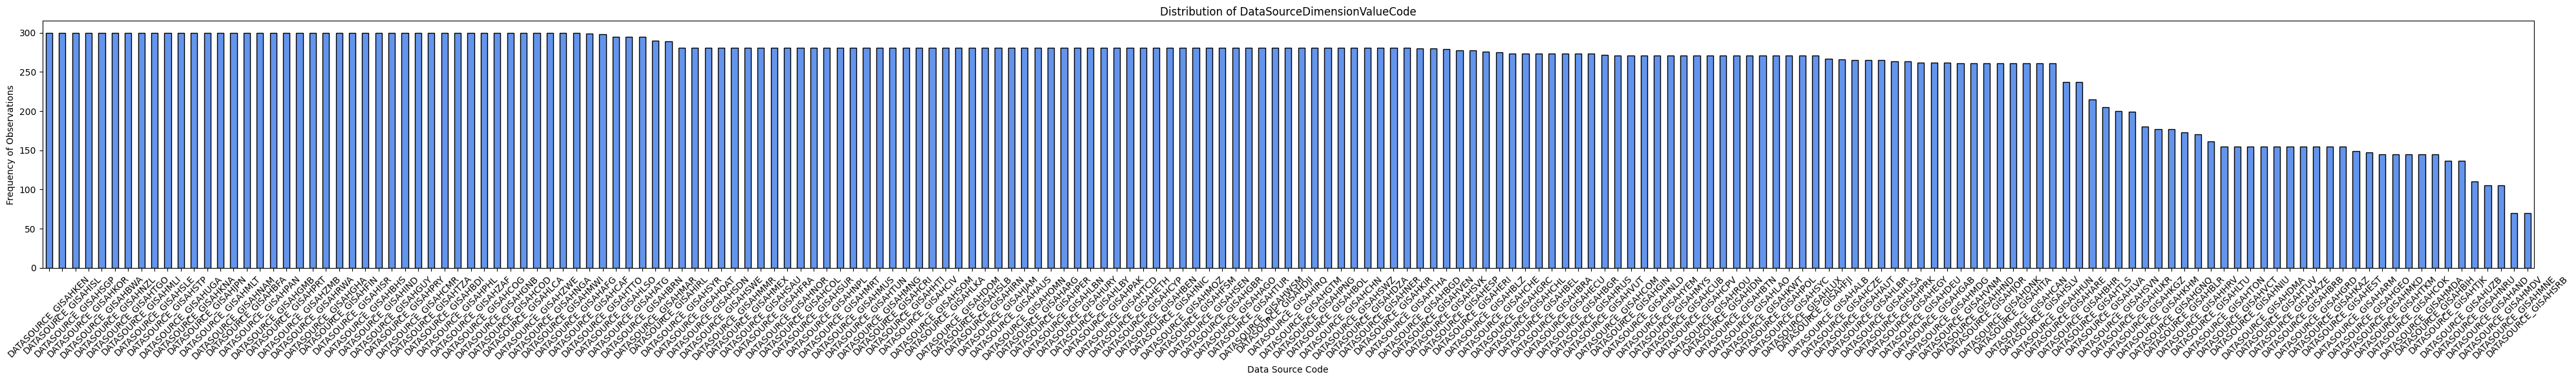

In [33]:
# Calculating the frequency distribution for 'DataSourceDimensionValueCode'
data_source_dim_value_code_freq = df['DataSourceDimensionValueCode'].value_counts()

# Plotting the distribution of 'DataSourceDimensionValueCode'
plt.figure(figsize=(40, 6))
data_source_dim_value_code_freq.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Distribution of DataSourceDimensionValueCode')
plt.xlabel('Data Source Code')
plt.ylabel('Frequency of Observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

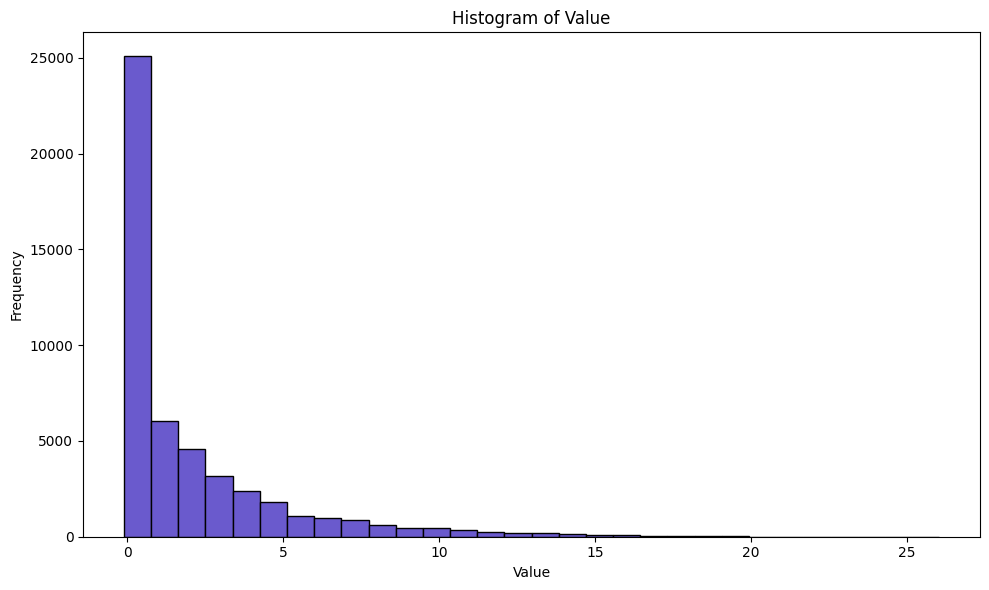

In [34]:
# Plotting a histogram for 'Value'
plt.figure(figsize=(10, 6))
plt.hist(df['Value'].dropna(), bins=30, color='slateblue', edgecolor='black')
plt.title('Histogram of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

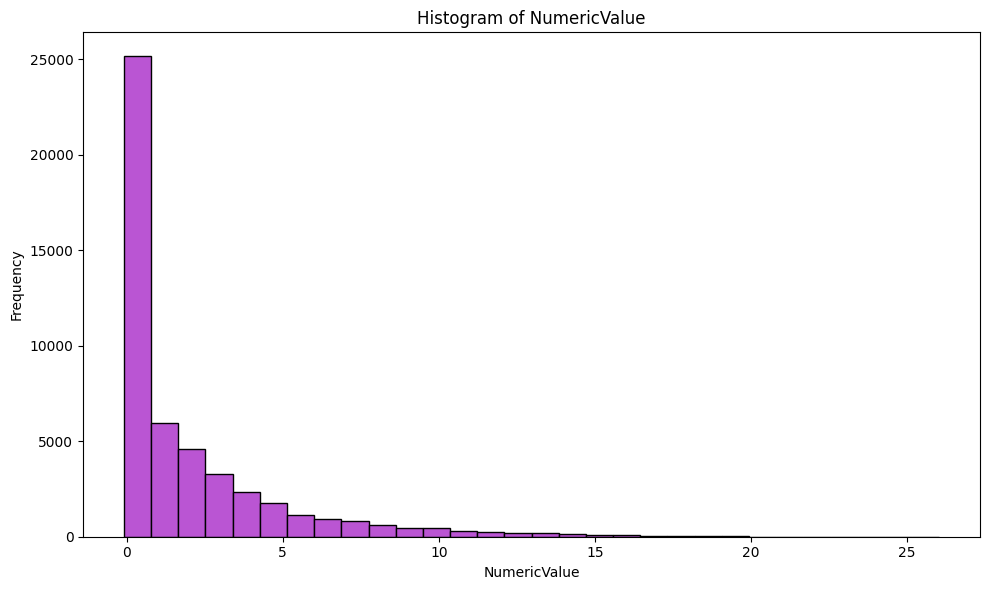

In [35]:
# Plotting a histogram for 'NumericValue'
plt.figure(figsize=(10, 6))
plt.hist(df['NumericValue'].dropna(), bins=30, color='mediumorchid', edgecolor='black')
plt.title('Histogram of NumericValue')
plt.xlabel('NumericValue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

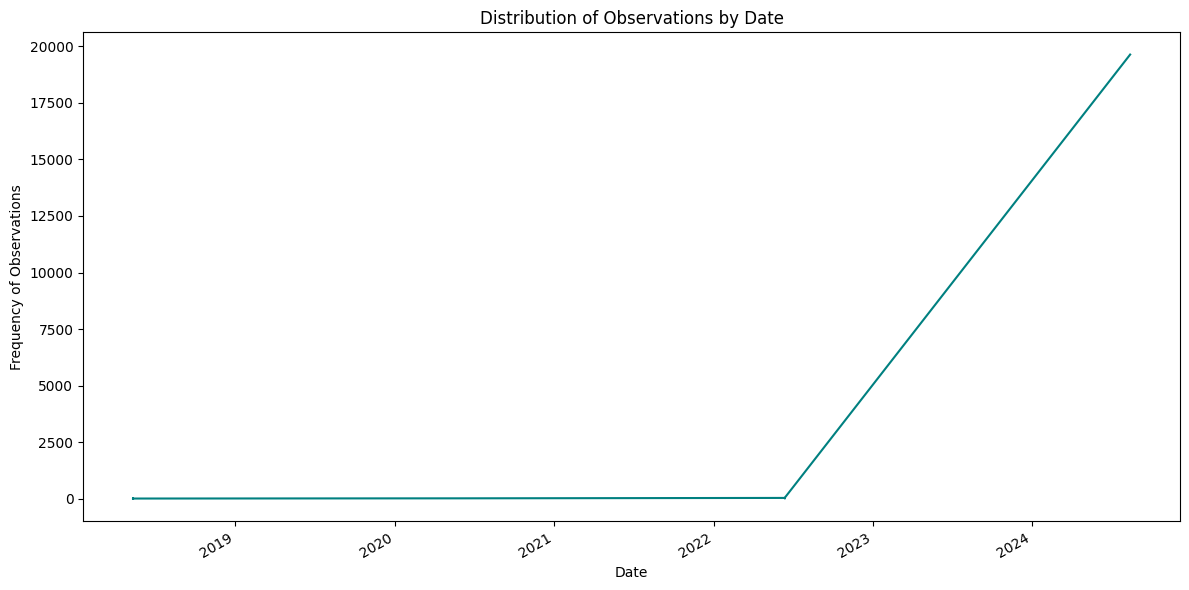

In [36]:
# Converting 'Date' to datetime format if it isn't already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Dropping any rows with invalid dates, if they exist
data = df.dropna(subset=['Date'])

# Plotting the distribution of 'Date'
plt.figure(figsize=(12, 6))
data['Date'].value_counts().sort_index().plot(kind='line', color='teal')
plt.title('Distribution of Data Collection Date')
plt.xlabel('Date')
plt.ylabel('Frequency of Observations')
plt.tight_layout()
plt.show()

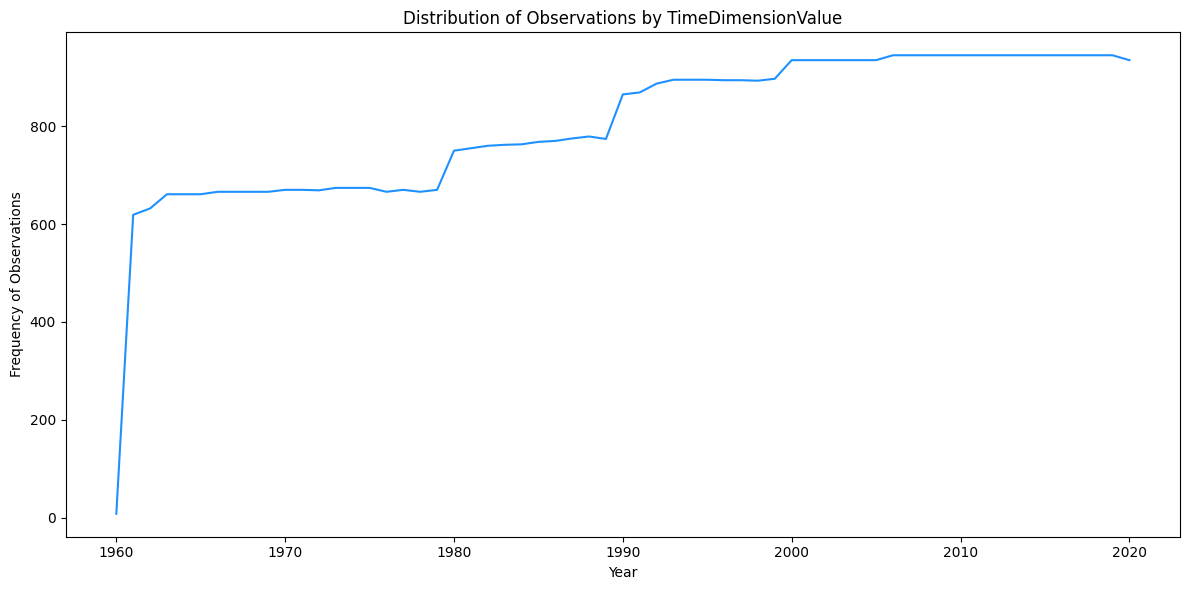

In [37]:
# Plotting the distribution of 'TimeDimensionValue'
plt.figure(figsize=(12, 6))
df['TimeDimensionValue'].value_counts().sort_index().plot(kind='line', color='dodgerblue')
plt.title('Distribution of Observations by TimeDimensionValue')
plt.xlabel('Year')
plt.ylabel('Frequency of Observations')
plt.tight_layout()
plt.show()

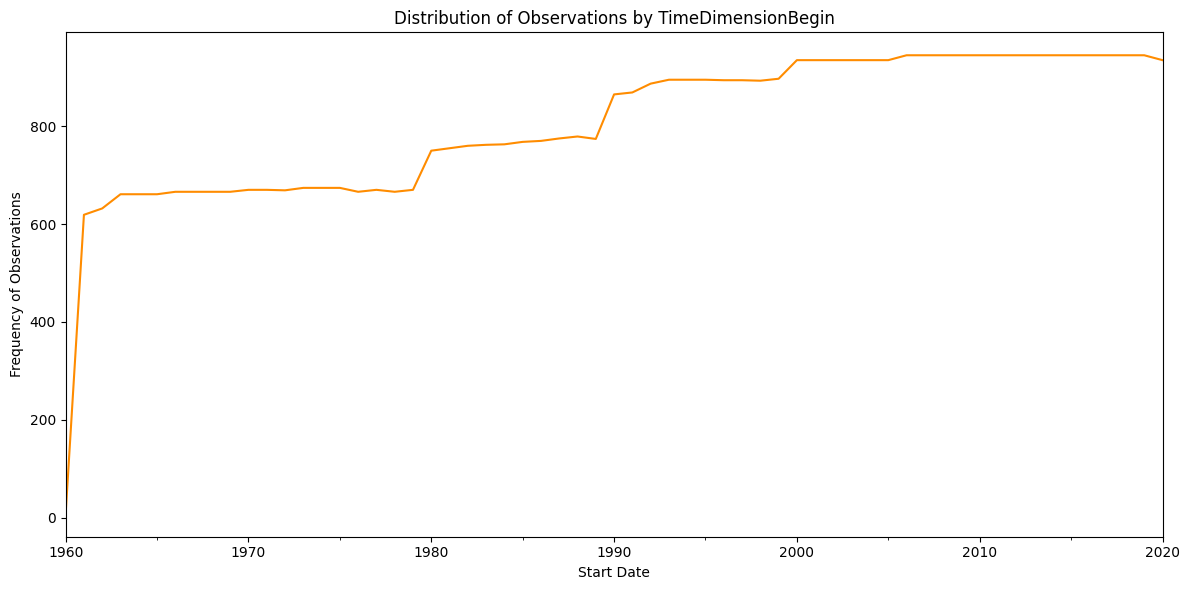

In [38]:
# Converting 'TimeDimensionBegin' to datetime format if it isn't already
df['TimeDimensionBegin'] = pd.to_datetime(df['TimeDimensionBegin'], errors='coerce')

# Dropping any rows with invalid dates, if they exist
data = df.dropna(subset=['TimeDimensionBegin'])

# Plotting the distribution of 'TimeDimensionBegin'
plt.figure(figsize=(12, 6))
data['TimeDimensionBegin'].value_counts().sort_index().plot(kind='line', color='darkorange')
plt.title('Distribution of Observations by TimeDimensionBegin')
plt.xlabel('Start Date')
plt.ylabel('Frequency of Observations')
plt.tight_layout()
plt.show()

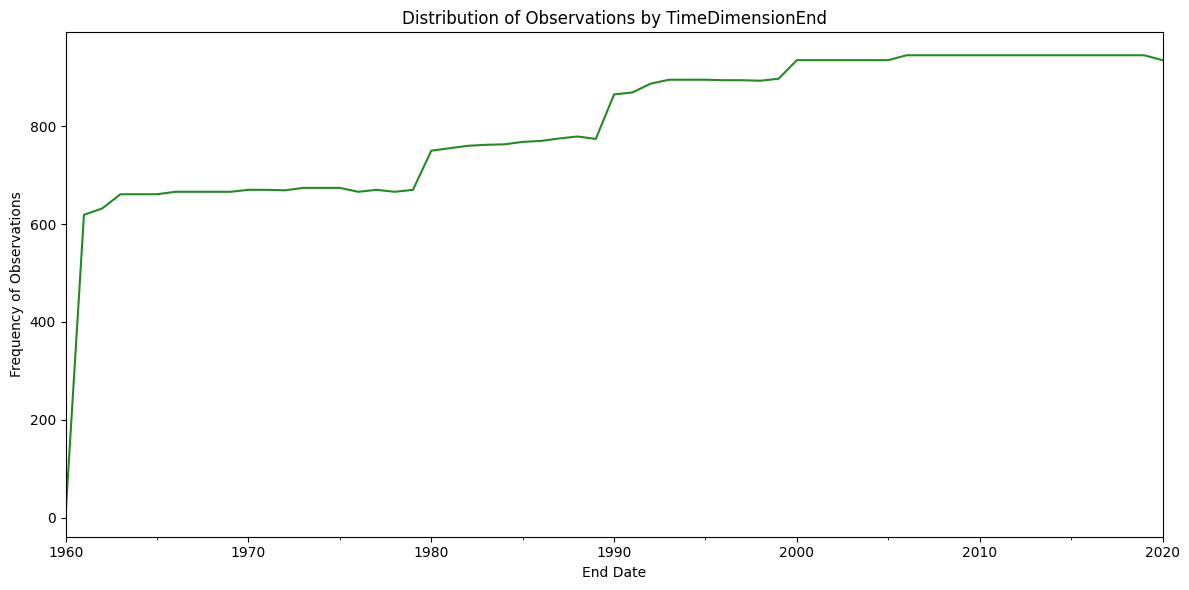

In [39]:
# Converting 'TimeDimensionEnd' to datetime format if it isn't already
df['TimeDimensionEnd'] = pd.to_datetime(df['TimeDimensionEnd'], errors='coerce')

# Dropping any rows with invalid dates, if they exist
data = df.dropna(subset=['TimeDimensionEnd'])

# Plotting the distribution of 'TimeDimensionEnd'
plt.figure(figsize=(12, 6))
data['TimeDimensionEnd'].value_counts().sort_index().plot(kind='line', color='forestgreen')
plt.title('Distribution of Observations by TimeDimensionEnd')
plt.xlabel('End Date')
plt.ylabel('Frequency of Observations')
plt.tight_layout()
plt.show()